#### DESCRIPTION

Problem Statement

Finance Industry is the biggest consumer of Data Scientists. It faces constant attack by fraudsters, who try to trick the system. Correctly identifying fraudulent transactions is often compared with finding needle in a haystack because of the low event rate. 
It is important that credit card companies are able to recognize fraudulent credit card transactions so that the customers are not charged for items that they did not purchase.
You are required to try various techniques such as supervised models with oversampling, unsupervised anomaly detection, and heuristics to get good accuracy at fraud detection.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

# Classifier Libraries
from sklearn import tree, linear_model, ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from plot_metric.functions import BinaryClassification

import collections

# Other Libraries
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.pipeline import make_pipeline
#from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
#from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import NearMiss
#from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold,StratifiedShuffleSplit, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve, roc_curve,auc
import warnings

In [2]:
df = pd.read_csv('./Dataset/train_data.csv')

In [3]:
df.shape

(227845, 31)

In [4]:
df.head()

Time        V1        V2        V3        V4        V5        V6  \
0   38355.0  1.043949  0.318555  1.045810  2.805989 -0.561113 -0.367956   
1   22555.0 -1.665159  0.808440  1.805627  1.903416 -0.821627  0.934790   
2    2431.0 -0.324096  0.601836  0.865329 -2.138000  0.294663 -1.251553   
3   86773.0 -0.258270  1.217501 -0.585348 -0.875347  1.222481 -0.311027   
4  127202.0  2.142162 -0.494988 -1.936511 -0.818288 -0.025213 -1.027245   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.032736 -0.042333 -0.322674  ... -0.240105 -0.680315  0.085328  0.684812   
1 -0.824802  0.975890  1.747469  ... -0.335332 -0.510994  0.035839  0.147565   
2  1.072114 -0.334896  1.071268  ...  0.012220  0.352856 -0.341505 -0.145791   
3  1.073860 -0.161408  0.200665  ... -0.424626 -0.781158  0.019316  0.178614   
4 -0.151627 -0.305750 -0.869482  ...  0.010115  0.021722  0.079463 -0.480899   

        V25       V26       V27       V28  Amount  Class  
0  0.318620 -0.204963  0.001662  0.037894   49.67      0  
1 -0.529358 -0.566950 -0.595998 -0.220086   16.94      0  
2  0.094194 -0.804026  0.229428 -0.021623    1.00      0  
3 -0.315616  0.096665  0.269740 -0.020635   10.78      0  
4  0.023846 -0.279076 -0.030121 -0.043888   39.96      0  

[5 rows x 31 columns]

In [5]:
## EDA on the train set
## Descriptive stats to summarize the central tendency, dispersion and shape of a dataset’s distribution

df.describe()

Time             V1             V2             V3  \
count  227845.000000  227845.000000  227845.000000  227845.000000   
mean    94752.853076      -0.003321      -0.001652       0.001066   
std     47500.410602       1.963028       1.661178       1.516107   
min         0.000000     -56.407510     -72.715728     -32.965346   
25%     54182.000000      -0.922851      -0.598040      -0.889246   
50%     84607.000000       0.012663       0.066665       0.182170   
75%    139340.000000       1.314821       0.804401       1.029449   
max    172792.000000       2.454930      22.057729       9.382558   

                  V4             V5             V6             V7  \
count  227845.000000  227845.000000  227845.000000  227845.000000   
mean       -0.000374       0.000877       0.000770      -0.000035   
std         1.415061       1.367074       1.325341       1.220384   
min        -5.683171     -42.147898     -26.160506     -43.557242   
25%        -0.848884      -0.690811      -0.767803      -0.554761   
50%        -0.019309      -0.055243      -0.273025       0.040409   
75%         0.744822       0.610852       0.400298       0.570631   
max        16.875344      34.801666      22.529298      36.877368   

                  V8             V9  ...            V21            V22  \
count  227845.000000  227845.000000  ...  227845.000000  227845.000000   
mean        0.001625      -0.000391  ...       0.000563       0.001234   
std         1.192648       1.097367  ...       0.734187       0.724544   
min       -73.216718     -13.434066  ...     -34.830382     -10.933144   
25%        -0.207838      -0.643365  ...      -0.228031      -0.540792   
50%         0.022928      -0.050932  ...      -0.028807       0.008697   
75%         0.327854       0.596671  ...       0.186852       0.529535   
max        20.007208      15.594995  ...      27.202839      10.503090   

                 V23            V24            V25            V26  \
count  227845.000000  227845.000000  227845.000000  227845.000000   
mean       -0.001002       0.000254       0.000218      -0.001128   
std         0.625165       0.606012       0.521348       0.482314   
min       -44.807735      -2.836627     -10.295397      -2.604551   
25%        -0.162264      -0.354099      -0.317450      -0.327910   
50%        -0.011614       0.041212       0.016221      -0.053257   
75%         0.147067       0.440051       0.351214       0.239885   
max        22.528412       4.022866       6.070850       3.463246   

                 V27            V28         Amount          Class  
count  227845.000000  227845.000000  227845.000000  227845.000000  
mean       -0.000346       0.000498      88.522327       0.001729  
std         0.400286       0.331184     248.100141       0.041548  
min       -22.565679     -11.710896       0.000000       0.000000  
25%        -0.070986      -0.053117       5.590000       0.000000  
50%         0.001315       0.011216      22.000000       0.000000  
75%         0.091105       0.078458      77.070000       0.000000  
max        12.152401      33.847808   19656.530000       1.000000  

[8 rows x 31 columns]

In [6]:
#check for missing values (null values)
df.isnull().sum().max()

#There are no null values in any of the columns

0

In [7]:
#check for imbalance in the fraud/not fraud class (column class)
df['Class'].value_counts()

0    227451
1       394
Name: Class, dtype: int64

In [8]:
## The classes are heavily skewed
print('No Frauds', round((df['Class'].value_counts()[0]/len(df)*100),2),'%')
print('Frauds', round((df['Class'].value_counts()[1]/len(df)*100),2),'%')

No Frauds 99.83 %
Frauds 0.17 %


Text(0.5, 1.0, 'Fraud Distribution \n 0 - No Fraud || 1 - Fraud')

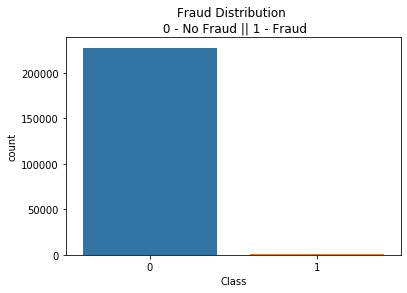

In [9]:
sns.countplot(x='Class', data=df)
plt.title('Fraud Distribution \n 0 - No Fraud || 1 - Fraud')

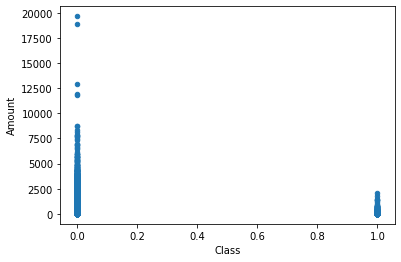

In [10]:
## Check for correlation between amount and class
df.plot.scatter(x='Class', y='Amount')

In [11]:
# Checking for the max amount for which fraudluent transaction has been done
df[df['Class']==1]['Amount'].max()

2125.87

In [12]:
amount_val=df['Amount'].values
time_val=df['Time'].values

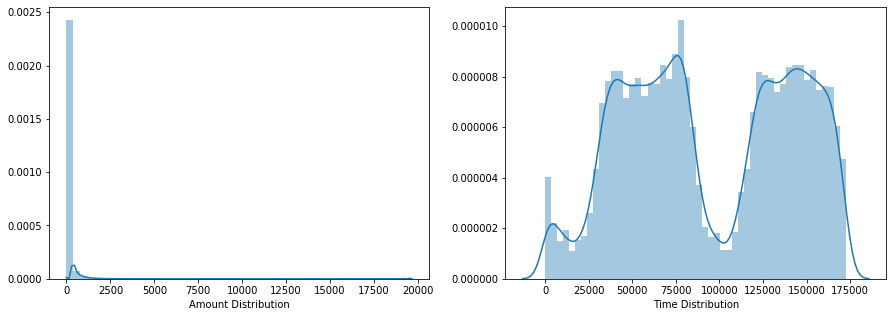

In [13]:
fig,ax = plt.subplots(1,2, figsize=(15,5),)
sns.distplot(amount_val,ax=ax[0],axlabel='Amount Distribution')
sns.distplot(time_val,ax=ax[1],axlabel='Time Distribution')

In [14]:
## Except for Time and Amount, all other features are already scaled. below snippet will scale Time and amount features.

from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()



In [15]:
df['scaled_amt'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))
df.drop(['Amount','Time'], axis=1, inplace=True)


In [16]:
df.head()

V1        V2        V3        V4        V5        V6        V7  \
0  1.043949  0.318555  1.045810  2.805989 -0.561113 -0.367956  0.032736   
1 -1.665159  0.808440  1.805627  1.903416 -0.821627  0.934790 -0.824802   
2 -0.324096  0.601836  0.865329 -2.138000  0.294663 -1.251553  1.072114   
3 -0.258270  1.217501 -0.585348 -0.875347  1.222481 -0.311027  1.073860   
4  2.142162 -0.494988 -1.936511 -0.818288 -0.025213 -1.027245 -0.151627   

         V8        V9       V10  ...       V22       V23       V24       V25  \
0 -0.042333 -0.322674  0.499167  ... -0.680315  0.085328  0.684812  0.318620   
1  0.975890  1.747469 -0.658751  ... -0.510994  0.035839  0.147565 -0.529358   
2 -0.334896  1.071268 -1.109522  ...  0.352856 -0.341505 -0.145791  0.094194   
3 -0.161408  0.200665  0.154307  ... -0.781158  0.019316  0.178614 -0.315616   
4 -0.305750 -0.869482  0.428729  ...  0.021722  0.079463 -0.480899  0.023846   

        V26       V27       V28  Class  scaled_amt  scaled_time  
0 -0.204963  0.001662  0.037894      0    0.387101    -0.543132  
1 -0.566950 -0.595998 -0.220086      0   -0.070789    -0.728669  
2 -0.804026  0.229428 -0.021623      0   -0.293788    -0.964983  
3  0.096665  0.269740 -0.020635      0   -0.156967     0.025435  
4 -0.279076 -0.030121 -0.043888      0    0.251259     0.500188  

[5 rows x 31 columns]

In [17]:
## From the above distributions, it is clear that the dataset is highly imbalnced.
## If the dataset is used as is, the classification models will assume that there are no frauds 
## and also we will not be able to see the true correlation between the other features.
## We will now be trying undersampling and oversampling techniques and compare the models to see their performance.

In [18]:
## Undersampling
## There are 394 fraud cases in the dataset. We will now be randomnly choosing No-Fraud samples to create a subsample.

# Number of data points in the minority class
number_records_fraud = len(df[df.Class == 1])
fraud_indices = np.array(df[df.Class == 1].index)

# Picking the indices of the normal classes
normal_indices = df[df.Class == 0].index

# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])




In [19]:
from sklearn.model_selection import train_test_split

In [20]:
#Whole dataset
X = df.loc[:, df.columns != 'Class']
y = df.loc[:, df.columns == 'Class']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)


# Under sample dataset
under_sample_data = df.iloc[under_sample_indices,:]

# Showing ratio
print("Number of normal transactions: ", len(under_sample_data[under_sample_data.Class == 0]))
print("Number of fraud transactions: ", len(under_sample_data[under_sample_data.Class == 1]))
print("Total number of transactions in resampled data: ", len(under_sample_data))

Number of normal transactions:  394
Number of fraud transactions:  394
Total number of transactions in resampled data:  788


In [21]:
X_undersample = under_sample_data.loc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.loc[:, under_sample_data.columns == 'Class']
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample
                                                                                                   ,y_undersample
                                                                                                   ,test_size = 0.3
                                                                                                   ,random_state = 0)


In [22]:
# Let's implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [23]:
# Wow our scores are getting even high scores even when applying cross validation.
from sklearn.model_selection import cross_val_score

In [24]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values


X_train_undersample = X_train_undersample.values
X_test_undersample = X_test_undersample.values
y_train_undersample = y_train_undersample.values
y_test_undersample = y_test_undersample.values


In [25]:
MLA_compare = pd.DataFrame()

row_index = 0

def MLA_testing(MLA, X_train, X_test, y_train, y_test):  
    global row_index
    
    # Training The Model
    MLA.fit(X_train, np.ravel(y_train))

    # KFold Accuracies on Training Data
    kfold_accuracy = cross_val_score(estimator = MLA, X = X_train, y = np.ravel(y_train), cv = 10, n_jobs=-1)
    print("K-Fold Accuracies:\n", kfold_accuracy, "\n")
    
    # Prediction on Testing Data
    y_pred = cross_val_predict(estimator = MLA, X = X_test, y = np.ravel(y_test), cv = 10, n_jobs=-1)
    
    # Accuracy for y_test and y_pred
    classifier_accuracy_score = accuracy_score(y_test, y_pred)
    print("Accuracy Score:\n", classifier_accuracy_score, "\n")
    
    # Confusion Matrix
    conf_mtx = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", conf_mtx, "\n")
    
    # Classification Report
    class_rep = classification_report(y_test, y_pred)
    print("Classification Report:\n", class_rep, "\n")
    
    # Precision - Recall Curve
    yhat = MLA.predict_proba(X_test)
    no_skill = len(under_sample_data.Class[under_sample_data.Class==1]) / len(under_sample_data.Class)
    precision, recall, _ = precision_recall_curve(y_test, yhat[:, 1])
    
    plt.figure(dpi=100, figsize=(15, 6))
    plt.subplot(121)
    sns.lineplot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    sns.lineplot(recall, precision, marker='.', label=MLA.__class__.__name__)
    plt.title("Recall vs Precision Curve")
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    
    # ROC Curve
    plt.subplot(122)
    sns.lineplot([0, 1], [0, 1], linestyle='--', label='No Skill')
    fpr, tpr, _ = roc_curve(y_test, yhat[:, 1])
    roc_auc = auc(fpr, tpr)
    
    sns.lineplot(fpr, tpr, marker='.', label=MLA.__class__.__name__)
    plt.title('ROC Curve' )
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    # Saving Data in Dataframe
    MLA_name = MLA.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'Accuracy Score'] = classifier_accuracy_score*100
    MLA_compare.loc[row_index, 'K-Fold Accuracy'] = kfold_accuracy.mean()*100

    print(MLA_name, "Done")
    
    row_index+=1

##  RandomForestClassifier

K-Fold Accuracies:
 [0.94642857 0.92727273 0.92727273 0.96363636 0.94545455 0.98181818
 0.98181818 0.83636364 0.89090909 0.98181818] 

Accuracy Score:
 0.9156118143459916 

Confusion Matrix:
 [[108   7]
 [ 13 109]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.92       115
           1       0.94      0.89      0.92       122

    accuracy                           0.92       237
   macro avg       0.92      0.92      0.92       237
weighted avg       0.92      0.92      0.92       237
 



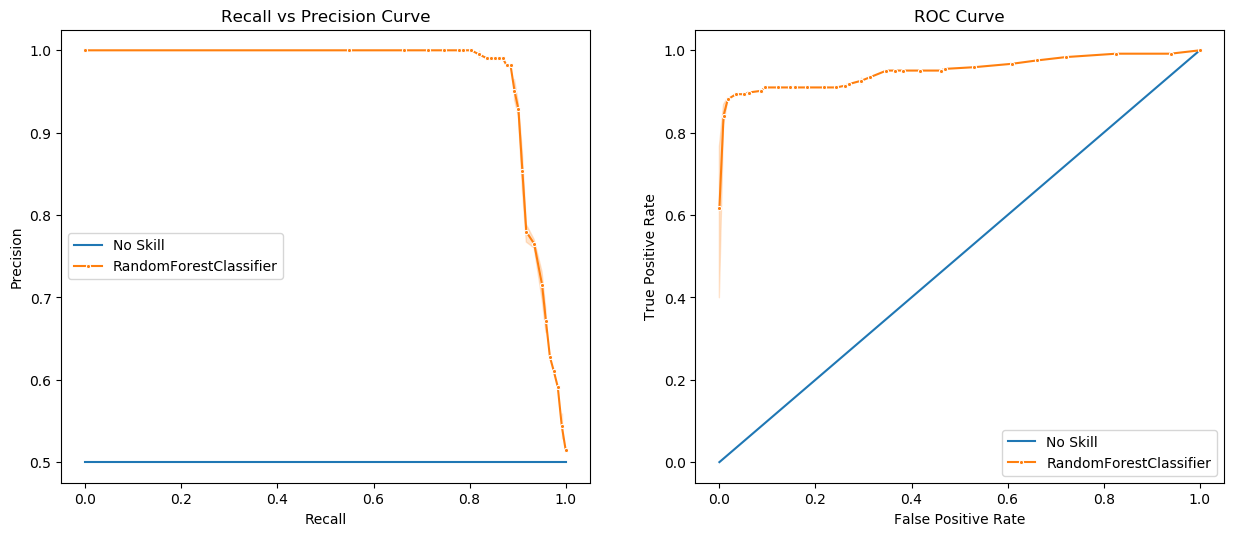

RandomForestClassifier Done


In [26]:
rf_clf = ensemble.RandomForestClassifier()

MLA_testing(rf_clf, X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample)

## GradientBoostingClassifier

K-Fold Accuracies:
 [0.94642857 0.98181818 0.94545455 0.94545455 0.96363636 0.98181818
 0.96363636 0.87272727 0.89090909 0.94545455] 

Accuracy Score:
 0.9156118143459916 

Confusion Matrix:
 [[108   7]
 [ 13 109]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.92       115
           1       0.94      0.89      0.92       122

    accuracy                           0.92       237
   macro avg       0.92      0.92      0.92       237
weighted avg       0.92      0.92      0.92       237
 



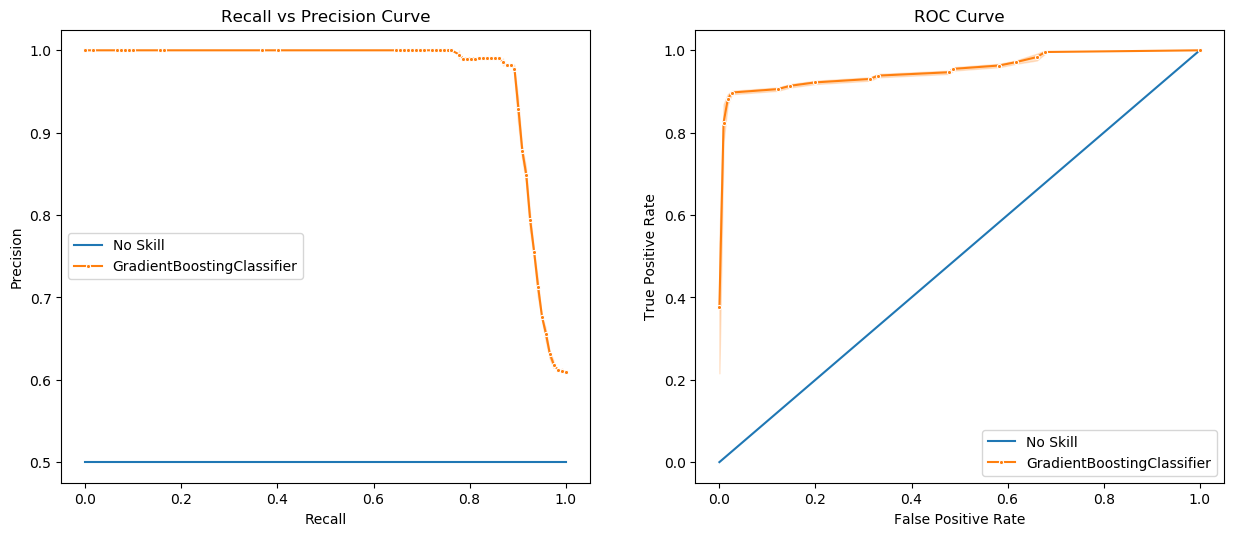

GradientBoostingClassifier Done


In [27]:
gb_clf = ensemble.GradientBoostingClassifier()

MLA_testing(gb_clf, X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample)

## LogisticRegression

K-Fold Accuracies:
 [0.96428571 0.96363636 0.94545455 0.94545455 0.96363636 0.98181818
 1.         0.87272727 0.92727273 0.98181818] 

Accuracy Score:
 0.9240506329113924 

Confusion Matrix:
 [[108   7]
 [ 11 111]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92       115
           1       0.94      0.91      0.93       122

    accuracy                           0.92       237
   macro avg       0.92      0.92      0.92       237
weighted avg       0.92      0.92      0.92       237
 



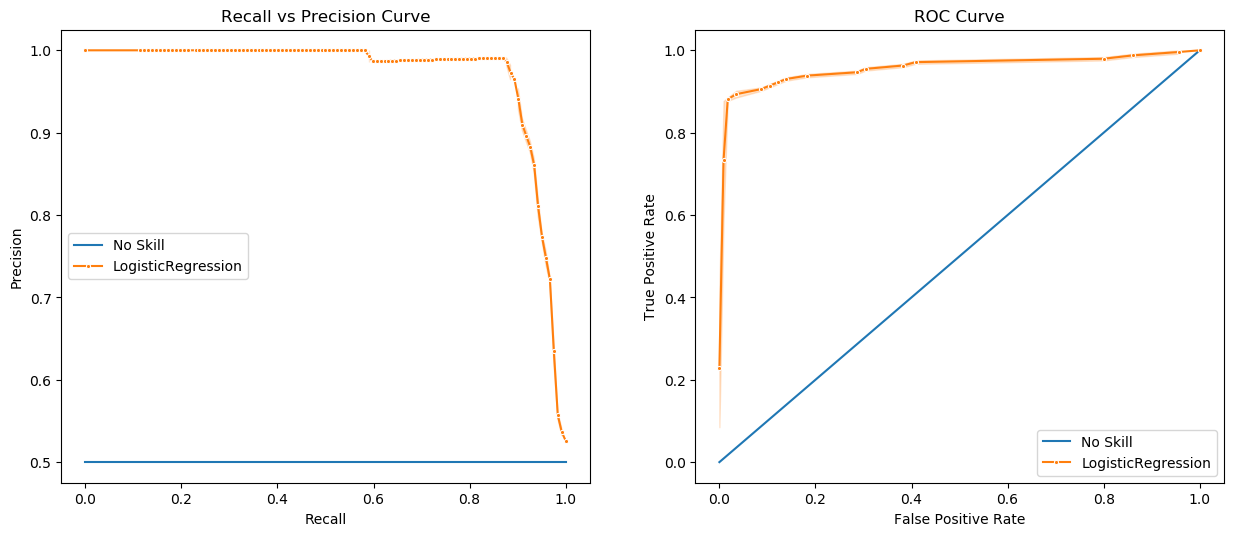

LogisticRegression Done


In [28]:
lr_clf = linear_model.LogisticRegression()

MLA_testing(lr_clf, X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample)

## SGDClassifier

K-Fold Accuracies:
 [0.92857143 0.92727273 0.94545455 0.92727273 0.92727273 0.98181818
 0.92727273 0.85454545 0.92727273 0.96363636] 

Accuracy Score:
 0.890295358649789 

Confusion Matrix:
 [[102  13]
 [ 13 109]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       115
           1       0.89      0.89      0.89       122

    accuracy                           0.89       237
   macro avg       0.89      0.89      0.89       237
weighted avg       0.89      0.89      0.89       237
 



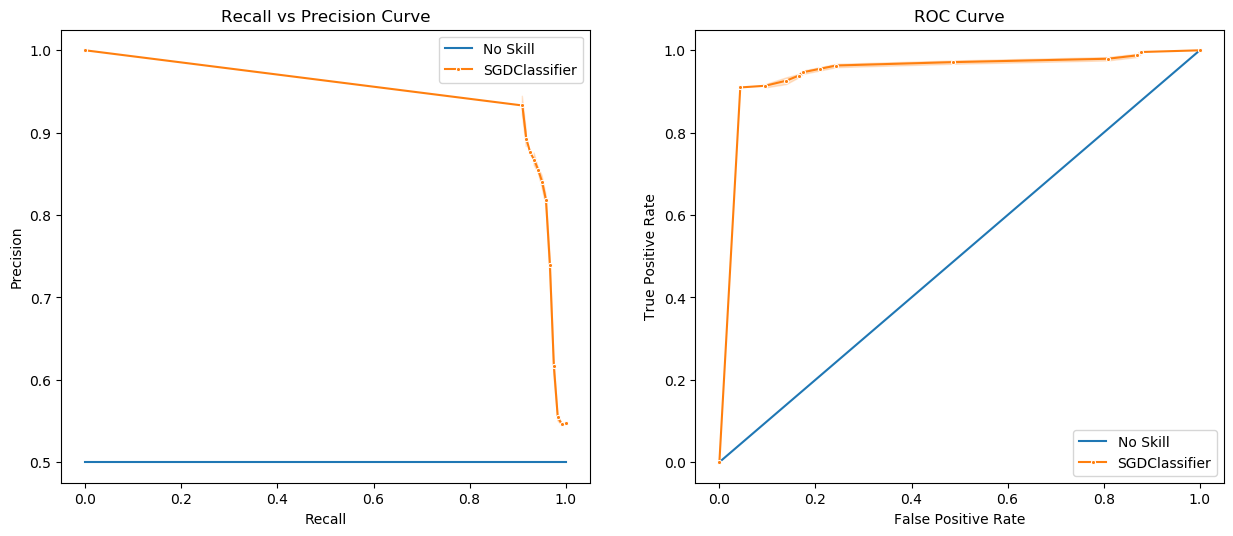

SGDClassifier Done


In [29]:
sgf_clf = linear_model.SGDClassifier(loss="log")

MLA_testing(sgf_clf,X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample)

## DecisionTreeClassifier

K-Fold Accuracies:
 [0.91071429 0.94545455 0.94545455 0.92727273 0.90909091 0.96363636
 0.89090909 0.85454545 0.87272727 0.94545455] 

Accuracy Score:
 0.8734177215189873 

Confusion Matrix:
 [[ 99  16]
 [ 14 108]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87       115
           1       0.87      0.89      0.88       122

    accuracy                           0.87       237
   macro avg       0.87      0.87      0.87       237
weighted avg       0.87      0.87      0.87       237
 



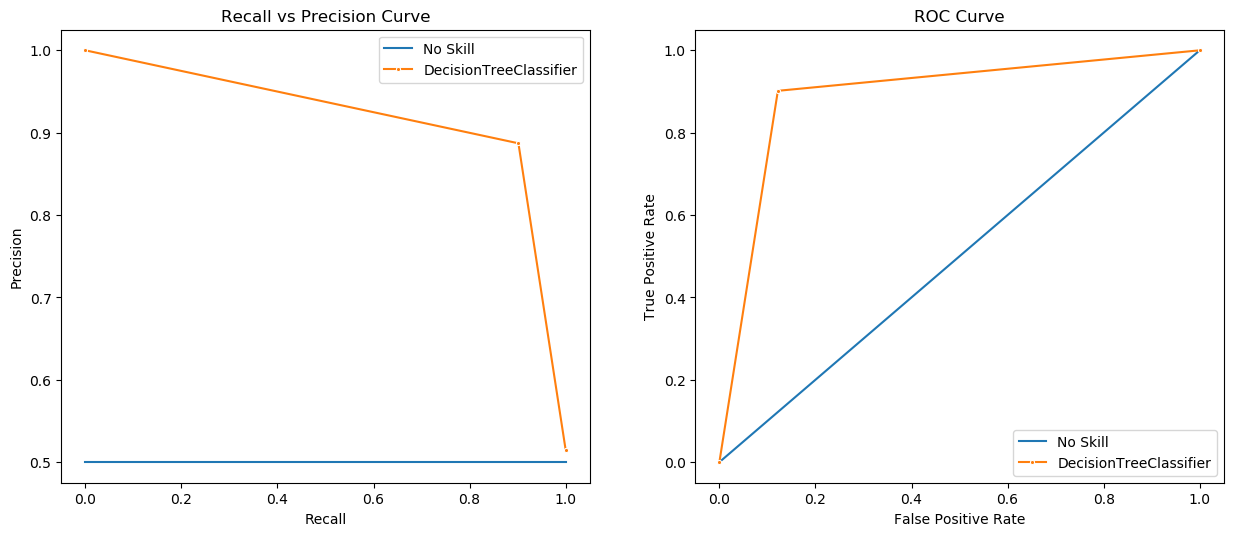

DecisionTreeClassifier Done


In [30]:
dt_clf = tree.DecisionTreeClassifier()

MLA_testing(dt_clf,X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample)

## Under Sampling - Compare algorithms

In [31]:
MLA_compare = MLA_compare.sort_values(by="K-Fold Accuracy", ascending=False).reset_index(drop=True)
MLA_compare

MLA Name  Accuracy Score  K-Fold Accuracy
0          LogisticRegression       92.405063        95.461039
1  GradientBoostingClassifier       91.561181        94.373377
2      RandomForestClassifier       91.561181        93.827922
3               SGDClassifier       89.029536        93.103896
4      DecisionTreeClassifier       87.341772        91.652597

## Over Sampling
We will be trying out SMOTE technique for oversampling the Fraud data.
SMOTE stands for Synthetic Minority Over-sampling Technique. Unlike Random UnderSampling, SMOTE creates new synthetic points in order to have an equal balance of the classes. This is another alternative for solving the "class imbalance problems".

Understanding SMOTE:

Solving the Class Imbalance: SMOTE creates synthetic points from the minority class in order to reach an equal balance between the minority and majority class.

Location of the synthetic points: SMOTE picks the distance between the closest neighbors of the minority class, in between these distances it creates synthetic points.

Final Effect: More information is retained since we didn't have to delete any rows unlike in random undersampling.
Accuracy || Time Tradeoff: Although it is likely that SMOTE will be more accurate than random under-sampling, it will take more time to train since no rows are eliminated as previously stated.

In [32]:
from imblearn.pipeline import make_pipeline as make_pipeline_imb # To do our transformation in a unique time
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import fbeta_score

In [33]:
def print_results(classifier,mdl,X_test_oversample,y_test_oversample,prediction):
    y_proba = mdl.predict_proba(X_test_oversample)
    preds = y_proba[:,1]
    
# Accuracy for y_test and y_pred
    print('\nSMOTE + ',type(classifier()).__name__)
    classifier_accuracy_score = accuracy_score( y_test_oversample, prediction)
    print("Accuracy Score:\n", classifier_accuracy_score, "\n")
    
# Confusion Matrix
    conf_mtx = confusion_matrix( y_test_oversample, prediction)
    print("Confusion Matrix:\n", conf_mtx, "\n")
    
# Classification Report
    class_rep = classification_report( y_test_oversample, prediction)
    print("Classification Report:\n", class_rep, "\n")

# Precision - Recall Curve
   
    no_skill = len(df.Class[df.Class==1]) / len(df.Class)
    precision, recall, _ = precision_recall_curve(y_test_oversample, preds)

    plt.figure(dpi=100, figsize=(15, 6))
    plt.subplot(121)
    sns.lineplot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    sns.lineplot(recall, precision, marker='.', label=type(classifier()).__name__)
    plt.title("Recall vs Precision Curve")
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()

# ROC Curve
    plt.subplot(122)
    sns.lineplot([0, 1], [0, 1], linestyle='--', label='No Skill')
    fpr, tpr, _ = roc_curve(y_test_oversample, preds)
    roc_auc = auc(fpr, tpr)

    sns.lineplot(fpr, tpr, marker='.', label=type(classifier()).__name__)
    plt.title('ROC Curve' )
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()


### Project Task: Week 2

Modeling Techniques:

Try out models like Naive Bayes, Logistic Regression or SVM. Find out which one performs the best
Use different Tree-based classifiers like Random Forest and XGBoost. 
       a.    Remember Tree-based classifiers work on two ideologies: Bagging or Boosting
       b.    Tree-based classifiers have fine-tuning parameters which takes care of the imbalanced class. Random-Forest and XGBboost.
Compare the results of 1 with 2 and check if there is any incremental gain.

### SMOTE + RandomForestClassifier

In [34]:

X = df.drop(["Class"], axis=1).values #Setting the X to do the split
y = df["Class"].values # transforming the values in array
# splitting data into training and test set
X_train_oversample, X_test_oversample, y_train_oversample, y_test_oversample = train_test_split(X, y, random_state=2, test_size=0.30)


In [35]:

classifier = RandomForestClassifier
smote_rf_pipeline = make_pipeline_imb(SMOTE(random_state=4), \
                                   classifier(random_state=42))
smote_rf_model = smote_rf_pipeline.fit(X_train_oversample, y_train_oversample)
smote_rf_prediction = smote_rf_model.predict(X_test_oversample)

In [36]:
#Showing the diference before and after the transformation used
print("normal data distribution: {}".format(Counter(y)))
X_smote, y_smote = SMOTE().fit_resample(X, y)
print("SMOTE data distribution: {}".format(Counter(y_smote)))

normal data distribution: Counter({0: 227451, 1: 394})
SMOTE data distribution: Counter({0: 227451, 1: 227451})


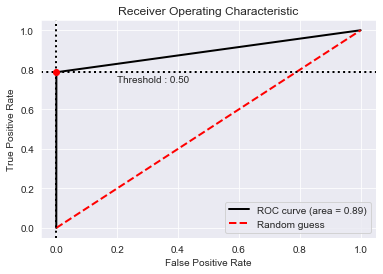

In [37]:
bc=BinaryClassification(y_test_oversample,smote_rf_prediction,labels=['Class1','Class2'])
plt.figure()
bc.plot_roc_curve()
plt.show()


SMOTE +  RandomForestClassifier
Accuracy Score:
 0.9993709219650643 

Confusion Matrix:
 [[68222    19]
 [   24    89]] 

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     68241
           1       0.82      0.79      0.81       113

    accuracy                           1.00     68354
   macro avg       0.91      0.89      0.90     68354
weighted avg       1.00      1.00      1.00     68354
 



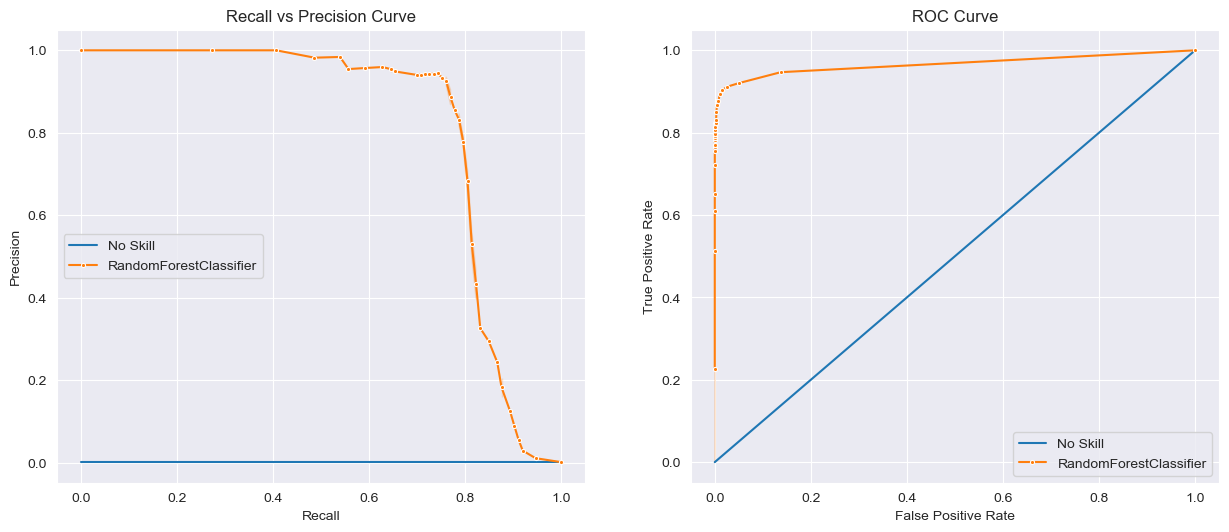

In [38]:
print_results(classifier,smote_rf_model,X_test_oversample,y_test_oversample,smote_rf_prediction)

### SMOTE + Logistic regression

In [39]:
X = df.drop(["Class"], axis=1).values #Setting the X to do the split
y = df["Class"].values # transforming the values in array
# splitting data into training and test set
X_train_oversample, X_test_oversample, y_train_oversample, y_test_oversample = train_test_split(X, y, random_state=2, test_size=0.30)



In [40]:
classifier = LogisticRegression
smote_lr_pipeline = make_pipeline_imb(SMOTE(random_state=4), \
                                   classifier(random_state=42,max_iter=10000))
smote_lr_model = smote_lr_pipeline.fit(X_train_oversample, y_train_oversample)
smote_lr_prediction = smote_lr_model.predict(X_test_oversample)


SMOTE +  LogisticRegression
Accuracy Score:
 0.9774117096292828 

Confusion Matrix:
 [[66710  1531]
 [   13   100]] 

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     68241
           1       0.06      0.88      0.11       113

    accuracy                           0.98     68354
   macro avg       0.53      0.93      0.55     68354
weighted avg       1.00      0.98      0.99     68354
 



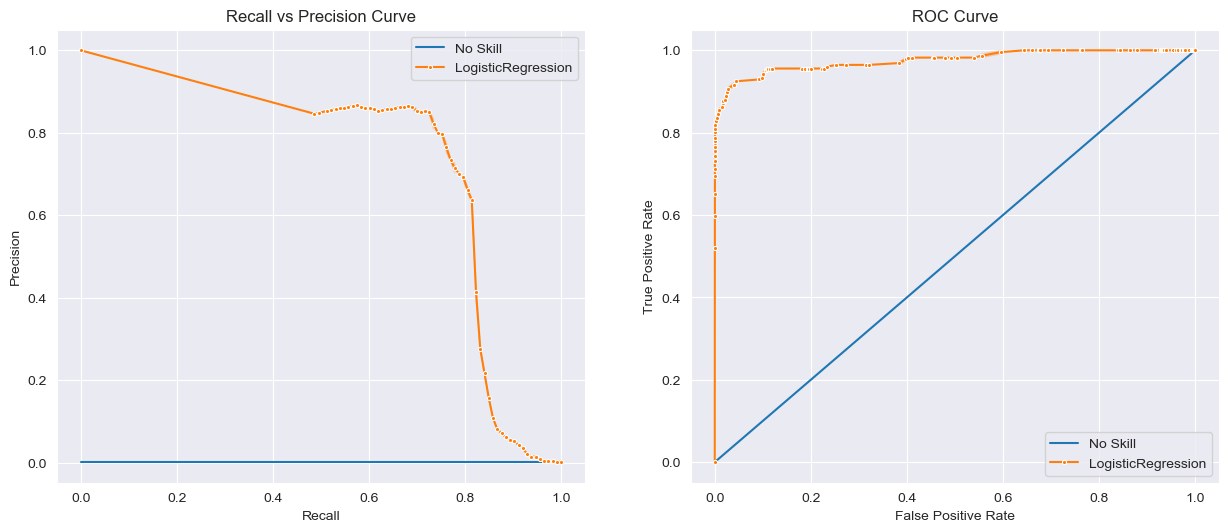

In [41]:
print_results(classifier,smote_lr_model,X_test_oversample,y_test_oversample,smote_lr_prediction)

### SMOTE + Naive Bayes


In [42]:
X = df.drop(["Class"], axis=1).values #Setting the X to do the split
y = df["Class"].values # transforming the values in array
# splitting data into training and test set
X_train_oversample, X_test_oversample, y_train_oversample, y_test_oversample = train_test_split(X, y, random_state=2, test_size=0.30)



In [43]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB
smote_nb_pipeline = make_pipeline_imb(SMOTE(random_state=4), \
                                   classifier())
smote_nb_model = smote_nb_pipeline.fit(X_train_oversample, y_train_oversample)
smote_nb_prediction = smote_nb_model.predict(X_test_oversample)


SMOTE +  GaussianNB
Accuracy Score:
 0.9759341077332709 

Confusion Matrix:
 [[66615  1626]
 [   19    94]] 

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     68241
           1       0.05      0.83      0.10       113

    accuracy                           0.98     68354
   macro avg       0.53      0.90      0.55     68354
weighted avg       1.00      0.98      0.99     68354
 



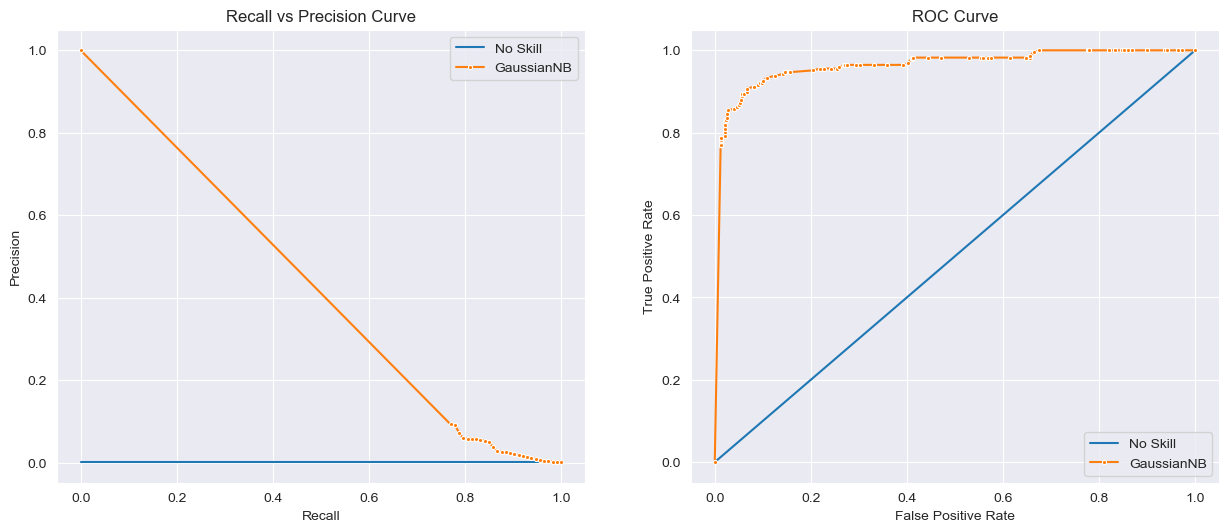

In [44]:
print_results(classifier,smote_nb_model,X_test_oversample,y_test_oversample,smote_nb_prediction)

In [45]:
X = df.drop(["Class"], axis=1).values #Setting the X to do the split
y = df["Class"].values # transforming the values in array
# splitting data into training and test set
X_train_oversample, X_test_oversample, y_train_oversample, y_test_oversample = train_test_split(X, y, random_state=2, test_size=0.30)


In [46]:
from xgboost import XGBClassifier
classifier = XGBClassifier
smote_xgb_pipeline = make_pipeline_imb(SMOTE(random_state=4), \
                                   classifier(use_label_encoder=False))
smote_xgb_model = smote_xgb_pipeline.fit(X_train_oversample, y_train_oversample)
smote_xgb_prediction = smote_xgb_model.predict(X_test_oversample)

[12:23:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.



SMOTE +  XGBClassifier
Accuracy Score:
 0.9993124030780934 

Confusion Matrix:
 [[68216    25]
 [   22    91]] 

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     68241
           1       0.78      0.81      0.79       113

    accuracy                           1.00     68354
   macro avg       0.89      0.90      0.90     68354
weighted avg       1.00      1.00      1.00     68354
 



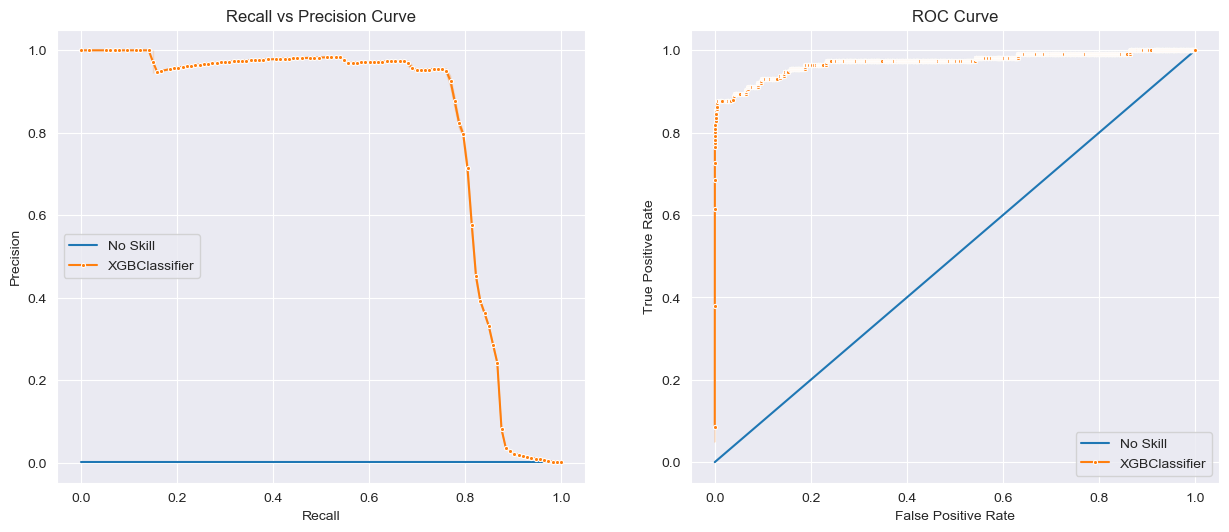

In [47]:
print_results(classifier,smote_xgb_model,X_test_oversample,y_test_oversample,smote_xgb_prediction)

### Project Task: Week 3

Applying ANN:

Use ANN (Artificial Neural Network) to identify fradulent and non-fradulent.
       a)    Fine-tune number of layers
       b)    Number of Neurons in each layers
       c)    Experiment in batch-size
       d)    Experiment with number of epochs. Check the observations in loss and accuracy
       e)    Play with different Learning Rate variants of Gradient Descent like Adam, SGD, RMS-prop
       f)    Find out which activation performs best for this use case and why?
       g)    Check Confusion Matrix, Precision, Recall and F1-Score
2.    Try out Dropout for ANN. How is it performed? Compare model performance with the traditional ML based prediction models from
       above. 
3.    Find the best setting of neural net that can be best classified as fraudulent and non-fraudulent transactions. Use
       techniques like Grid Search, Cross-Validation and Random search.

In [48]:
df.head()

V1        V2        V3        V4        V5        V6        V7  \
0  1.043949  0.318555  1.045810  2.805989 -0.561113 -0.367956  0.032736   
1 -1.665159  0.808440  1.805627  1.903416 -0.821627  0.934790 -0.824802   
2 -0.324096  0.601836  0.865329 -2.138000  0.294663 -1.251553  1.072114   
3 -0.258270  1.217501 -0.585348 -0.875347  1.222481 -0.311027  1.073860   
4  2.142162 -0.494988 -1.936511 -0.818288 -0.025213 -1.027245 -0.151627   

         V8        V9       V10  ...       V22       V23       V24       V25  \
0 -0.042333 -0.322674  0.499167  ... -0.680315  0.085328  0.684812  0.318620   
1  0.975890  1.747469 -0.658751  ... -0.510994  0.035839  0.147565 -0.529358   
2 -0.334896  1.071268 -1.109522  ...  0.352856 -0.341505 -0.145791  0.094194   
3 -0.161408  0.200665  0.154307  ... -0.781158  0.019316  0.178614 -0.315616   
4 -0.305750 -0.869482  0.428729  ...  0.021722  0.079463 -0.480899  0.023846   

        V26       V27       V28  Class  scaled_amt  scaled_time  
0 -0.204963  0.001662  0.037894      0    0.387101    -0.543132  
1 -0.566950 -0.595998 -0.220086      0   -0.070789    -0.728669  
2 -0.804026  0.229428 -0.021623      0   -0.293788    -0.964983  
3  0.096665  0.269740 -0.020635      0   -0.156967     0.025435  
4 -0.279076 -0.030121 -0.043888      0    0.251259     0.500188  

[5 rows x 31 columns]

In [49]:
X = df.drop(["Class"], axis=1).values #Setting the X to do the split
y = df["Class"].values # transforming the values in array
# splitting data into training and test set
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, random_state=2, test_size=0.30)


### RandomizedSearchCV

In [50]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [20]}

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(X_Train,Y_Train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   43.7s finished


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [5, 7, 10],
                                        'n_estimators': [20]},
                   random_state=101, verbose=1)

In [51]:
predictionforest = model.best_estimator_.predict(X_Test)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))
acc3 = accuracy_score(Y_Test,predictionforest)


[[68229    12]
 [   54    59]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     68241
           1       0.83      0.52      0.64       113

    accuracy                           1.00     68354
   macro avg       0.92      0.76      0.82     68354
weighted avg       1.00      1.00      1.00     68354



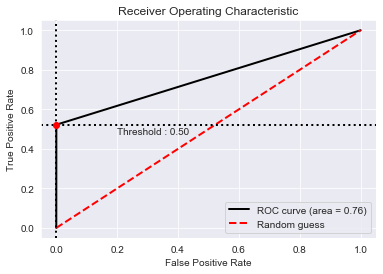

In [52]:

bc= BinaryClassification(Y_Test,predictionforest,labels=['Class1','Class2'])
plt.figure()
bc.plot_roc_curve()
plt.show()

### GridSearchCV

In [53]:
from sklearn.model_selection import GridSearchCV

grid_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [20]}

clf = RandomForestClassifier()
model = GridSearchCV(estimator = clf, param_grid = grid_search, 
                               cv = 4, verbose= 5, n_jobs = -1)
model.fit(X_Train,Y_Train)

Fitting 4 folds for each of 36 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  2.4min finished


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [2],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [4, 6, 8],
                         'min_samples_split': [5, 7, 10],
                         'n_estimators': [20]},
             verbose=5)

In [54]:
predictionforest = model.best_estimator_.predict(X_Test)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))
acc4 = accuracy_score(Y_Test,predictionforest)

[[68229    12]
 [   53    60]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     68241
           1       0.83      0.53      0.65       113

    accuracy                           1.00     68354
   macro avg       0.92      0.77      0.82     68354
weighted avg       1.00      1.00      1.00     68354



### ANN

In [55]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau


In [56]:
X = np.array(df.drop(columns = ['Class']))
y = np.array(df['Class'])
xtr, xte, ytr, yte = train_test_split(X, y, test_size = 0.25 , shuffle = True)

In [57]:
def build_classifier(opt):
    model = Sequential()
    model.add(Dense(units = 32,kernel_initializer="uniform",activation="relu",input_shape = (30,)))
    model.add(Dense(units = 64,kernel_initializer="uniform",activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(units = 32,kernel_initializer="uniform",activation="relu"))
    model.add(Dense(units = 1,kernel_initializer="uniform",activation="sigmoid"))
    model.compile(optimizer = opt,loss="binary_crossentropy",metrics=['Recall','acc'])
    return model

Epoch 1/10
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
535/535 [==============================] - 1s 2ms/step - loss: 0.0545 - recall: 0.0000e+00 - acc: 0.9981 - val_loss: 0.0036 - val_recall: 0.0000e+00 - val_acc: 0.9984 - lr: 0.0010
Epoch 2/10
535/535 [==============================] - 1s 2ms/step - loss: 0.0044 - recall: 0.0000e+00 - acc: 0.9983 - val_loss: 0.0032 - val_recall: 0.0000e+00 - val_acc: 0.9984 - lr: 0.0010
Epoch 3/10
535/535 [==============================] - 1s 2ms/step - loss: 0.0038 - recall: 0.0000e+00 - acc: 0.9983 - val_loss: 0.0028 - val_recall: 0.0000e+00 - val_acc: 0.9984 - lr: 0.0010
Epoch 4/10
535/535 [==============================] - 1s 2ms/step - loss: 0.0035 - recall: 0.0000e+00 - acc: 0.9983 - val_loss: 0.0026 - val_recall: 0.0000e+00 - val_acc: 0.9984 - lr: 0.0010
Epoch 5/10
535/535 [==============================] - 1s 2ms/step - loss: 0.0033 - recall: 0.0000e+00 - acc: 0.9983 - val_loss: 0.0026 - val_recall: 0.0000

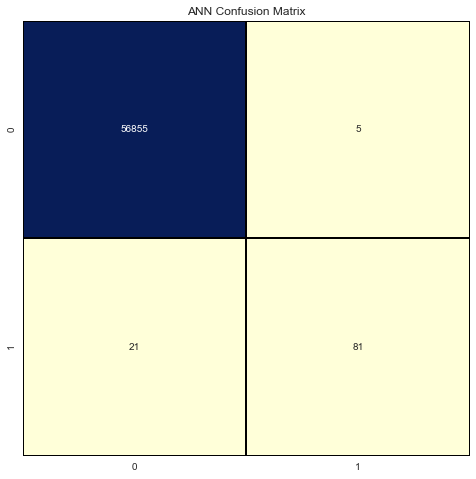

In [58]:
## Using Adam optimiser and exerimting with different batch size
opt='adam'
model1 = build_classifier(opt)

history = model1.fit(xtr,ytr,epochs=10,batch_size=256,shuffle=True,verbose=1,validation_split=0.2, callbacks=[ReduceLROnPlateau(patience=3, verbose=1, min_lr=1e-6), 
                               EarlyStopping(patience=5, verbose=1)])

#clear_output()

predictions = (model1.predict(xte) > 0.5).astype('int32').reshape(xte.shape[0],)
conf_matrix = confusion_matrix(yte, predictions)
print(classification_report(yte, predictions))

plt.figure(figsize=(8,8))
ax = plt.axes()
sns.heatmap(conf_matrix,annot=True,fmt='g',cbar=False,axes=ax,cmap ="YlGnBu",linewidths=1,linecolor='black')
ax.set_title('ANN Confusion Matrix')

plt.show()

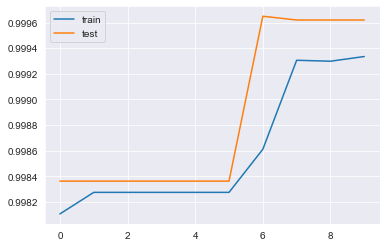

In [59]:
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show()

In [60]:
X = np.array(df.drop(columns = ['Class']))
y = np.array(df['Class'])
xtr, xte, ytr, yte = train_test_split(X, y, test_size = 0.25 , shuffle = True)

X = np.array(df.drop(columns = ['Class']))
y = np.array(df['Class'])
xtr, xte, ytr, yte = train_test_split(X, y, test_size = 0.25 , shuffle = True)

Epoch 1/10
535/535 [==============================] - 1s 2ms/step - loss: 0.0793 - recall: 0.0000e+00 - acc: 0.9980 - val_loss: 0.0174 - val_recall: 0.0000e+00 - val_acc: 0.9981 - lr: 0.0100
Epoch 2/10
535/535 [==============================] - 1s 2ms/step - loss: 0.0142 - recall: 0.0000e+00 - acc: 0.9983 - val_loss: 0.0140 - val_recall: 0.0000e+00 - val_acc: 0.9981 - lr: 0.0100
Epoch 3/10
535/535 [==============================] - 1s 2ms/step - loss: 0.0127 - recall: 0.0000e+00 - acc: 0.9983 - val_loss: 0.0131 - val_recall: 0.0000e+00 - val_acc: 0.9981 - lr: 0.0100
Epoch 4/10
535/535 [==============================] - 1s 2ms/step - loss: 0.0113 - recall: 0.0000e+00 - acc: 0.9983 - val_loss: 0.0108 - val_recall: 0.0000e+00 - val_acc: 0.9981 - lr: 0.0100
Epoch 5/10
535/535 [==============================] - 1s 2ms/step - loss: 0.0093 - recall: 0.0000e+00 - acc: 0.9983 - val_loss: 0.0090 - val_recall: 0.0000e+00 - val_acc: 0.9981 - lr: 0.0100
Epoch 6/10
535/535 [=========================

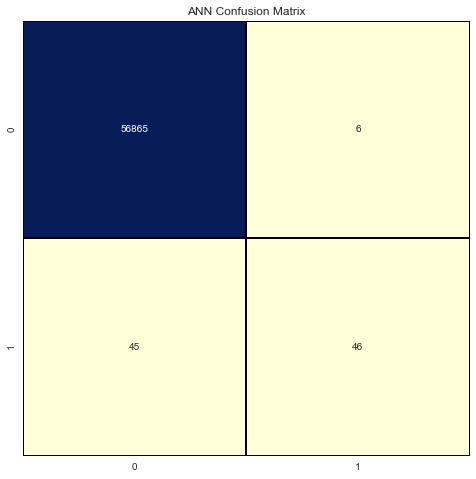

In [61]:
## Using SGD optimiser and exerimting with different batch size
opt = SGD(lr=0.01, momentum=0.9)
model2 = build_classifier(opt)

history = model2.fit(xtr,ytr,epochs=10,batch_size=256,shuffle=True,verbose=1,validation_split=0.2, callbacks=[ReduceLROnPlateau(patience=3, verbose=1, min_lr=1e-6), 
                               EarlyStopping(patience=5, verbose=1)])

#clear_output()

predictions = (model2.predict(xte) > 0.5).astype('int32').reshape(xte.shape[0],)
conf_matrix = confusion_matrix(yte, predictions)
print(classification_report(yte, predictions))

plt.figure(figsize=(8,8))
ax = plt.axes()
sns.heatmap(conf_matrix,annot=True,fmt='g',cbar=False,axes=ax,cmap ="YlGnBu",linewidths=1,linecolor='black')
ax.set_title('ANN Confusion Matrix')

plt.show()

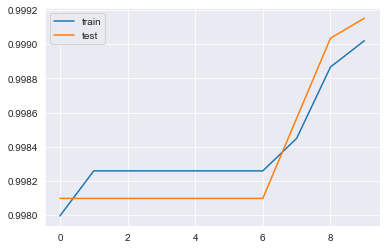

In [62]:
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show()

In [63]:
X = np.array(df.drop(columns = ['Class']))
y = np.array(df['Class'])
xtr, xte, ytr, yte = train_test_split(X, y, test_size = 0.25 , shuffle = True)

Epoch 1/10
274/274 [==============================] - 1s 4ms/step - loss: 0.0621 - recall: 0.0000e+00 - acc: 0.9979 - val_loss: 0.0043 - val_recall: 0.0000e+00 - val_acc: 0.9980 - lr: 0.0010
Epoch 2/10
274/274 [==============================] - 1s 2ms/step - loss: 0.0043 - recall: 0.6026 - acc: 0.9992 - val_loss: 0.0036 - val_recall: 0.7313 - val_acc: 0.9992 - lr: 0.0010
Epoch 3/10
274/274 [==============================] - 1s 2ms/step - loss: 0.0039 - recall: 0.7308 - acc: 0.9993 - val_loss: 0.0032 - val_recall: 0.7612 - val_acc: 0.9992 - lr: 0.0010
Epoch 4/10
274/274 [==============================] - 1s 2ms/step - loss: 0.0036 - recall: 0.7735 - acc: 0.9994 - val_loss: 0.0031 - val_recall: 0.7612 - val_acc: 0.9992 - lr: 0.0010
Epoch 5/10
274/274 [==============================] - 1s 2ms/step - loss: 0.0034 - recall: 0.7821 - acc: 0.9994 - val_loss: 0.0031 - val_recall: 0.7761 - val_acc: 0.9992 - lr: 0.0010
Epoch 6/10
242/274 [=========================>....] - ETA: 0s - loss: 0.0033 

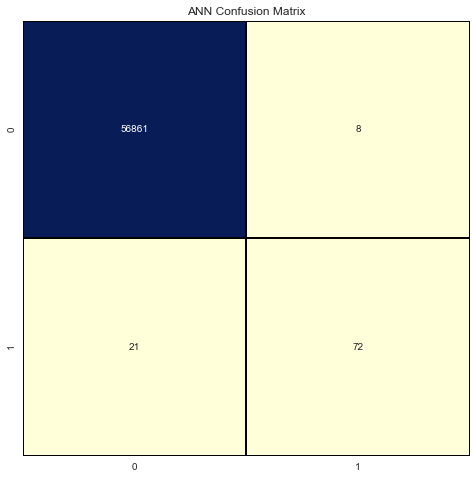

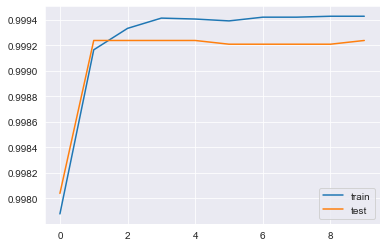

In [64]:
## Using rmsprop optimiser and exerimting with different batch size
opt = 'rmsprop'
model3 = build_classifier(opt)

history = model3.fit(xtr,ytr,epochs=10,batch_size=500,shuffle=True,verbose=1,validation_split=0.2, callbacks=[ReduceLROnPlateau(patience=3, verbose=1, min_lr=1e-6), 
                               EarlyStopping(patience=5, verbose=1)])

#clear_output()

predictions = (model3.predict(xte) > 0.5).astype('int32').reshape(xte.shape[0],)
conf_matrix = confusion_matrix(yte, predictions)
print(classification_report(yte, predictions))

plt.figure(figsize=(8,8))
ax = plt.axes()
sns.heatmap(conf_matrix,annot=True,fmt='g',cbar=False,axes=ax,cmap ="YlGnBu",linewidths=1,linecolor='black')
ax.set_title('ANN Confusion Matrix')
plt.show()

plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show()

### Project Task: Week 4

Inference and Observations:

Visualize the scores for Fraudulent and Non-Fraudulent transactions.
Find out the threshold value for marking or reporting a transaction as fraudulent in your anomaly detection system.
Can this score be used as an engineered feature in the models developed previously? Are there any incremental gains in F1-Score? Why or Why not?
Be as creative as possible in finding other interesting insights.

### Anomaly Detection using Gaussian Distribution


In [78]:
import matplotlib.gridspec as gridspec
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot


In [65]:
train_df = pd.read_csv('./Dataset/train_data.csv')
print(train_df.columns.values)

['Time' 'V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V8' 'V9' 'V10' 'V11' 'V12'
 'V13' 'V14' 'V15' 'V16' 'V17' 'V18' 'V19' 'V20' 'V21' 'V22' 'V23' 'V24'
 'V25' 'V26' 'V27' 'V28' 'Amount' 'Class']


I will be defining the below two functions which are required to calculate Gaussian Distribution of the normalized variables provided in the dataset (V1, V2 ....V28, Amount ).
note- These functions will be invoked for building the model

1) Find out mu and Sigma for the dataframe variables passed to this function.
2) Calculate Probability Distribution for the each row (I will explain why we need Probality for each row as we proceed)
Formula:- if each example x has N dimensiona(features) then below formula is used to calculate the P value

P(x) = p(x1,u1,sigma1^2)p(x2,u2,sigma2^2)p(x3,u3,sigma3^2).....p(xn,un,sigma'N'^2)

In [86]:
def estimateGaussian(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.cov(dataset.T)
    return mu, sigma

def multivariateGaussian(dataset,mu,sigma):
    p = multivariate_normal(mean=mu, cov=sigma)
    return p.pdf(dataset)

 I have decided values for Epsilon for detecting the fradulent transactions from the Subsets.Ideally you should provide range of epsilon values, since this is demonstration, i am goign with selected values
 

In [66]:
def selectThresholdByCV(probs,gt):
    best_epsilon = 0
    best_f1 = 0
    f = 0
    farray = []
    Recallarray = []
    Precisionarray = []
    epsilons = (0.0000e+00, 1.0527717316e-70, 1.0527717316e-50, 1.0527717316e-24)
    #epsilons = np.asarray(epsilons)
    for epsilon in epsilons:
        predictions = (p_cv < epsilon)
        f = f1_score(train_cv_y, predictions, average = "binary")
        Recall = recall_score(train_cv_y, predictions, average = "binary")
        Precision = precision_score(train_cv_y, predictions, average = "binary")
        farray.append(f)
        Recallarray.append(Recall)
        Precisionarray.append(Precision)
        print ('For below Epsilon')
        print(epsilon)
        print ('F1 score , Recall and Precision are as below')
        print ('Best F1 Score %f' %f)
        print ('Best Recall Score %f' %Recall)
        print ('Best Precision Score %f' %Precision)
        print ('-'*40)
        if f > best_f1:
            best_f1 = f
            best_recall = Recall
            best_precision = Precision
            best_epsilon = epsilon    
    fig = plt.figure()
    ax = fig.add_axes([0.1, 0.5, 0.7, 0.3])
    #plt.subplot(3,1,1)
    plt.plot(farray ,"ro")
    plt.plot(farray)
    ax.set_xticks(range(5))
    ax.set_xticklabels(epsilons,rotation = 60 ,fontsize = 'medium' )
    ax.set_ylim((0,1.0))
    ax.set_title('F1 score vs Epsilon value')
    ax.annotate('Best F1 Score', xy=(best_epsilon,best_f1), xytext=(best_epsilon,best_f1))
    plt.xlabel("Epsilon value") 
    plt.ylabel("F1 Score") 
    plt.show()
    fig = plt.figure()
    ax = fig.add_axes([0.1, 0.5, 0.9, 0.3])
    #plt.subplot(3,1,2)
    plt.plot(Recallarray ,"ro")
    plt.plot(Recallarray)
    ax.set_xticks(range(5))
    ax.set_xticklabels(epsilons,rotation = 60 ,fontsize = 'medium' )
    ax.set_ylim((0,1.0))
    ax.set_title('Recall vs Epsilon value')
    ax.annotate('Best Recall Score', xy=(best_epsilon,best_recall), xytext=(best_epsilon,best_recall))
    plt.xlabel("Epsilon value") 
    plt.ylabel("Recall Score") 
    plt.show()
    fig = plt.figure()
    ax = fig.add_axes([0.1, 0.5, 0.9, 0.3])
    #plt.subplot(3,1,3)
    plt.plot(Precisionarray ,"ro")
    plt.plot(Precisionarray)
    ax.set_xticks(range(5))
    ax.set_xticklabels(epsilons,rotation = 60 ,fontsize = 'medium' )
    ax.set_ylim((0,1.0))
    ax.set_title('Precision vs Epsilon value')
    ax.annotate('Best Precision Score', xy=(best_epsilon,best_precision), xytext=(best_epsilon,best_precision))
    plt.xlabel("Epsilon value") 
    plt.ylabel("Precision Score") 
    plt.show()
    return best_f1, best_epsilon

Lets visualize which features are not much of help in detecting the anamoly



In [69]:
v_features = train_df.iloc[:,1:29].columns
v_features

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

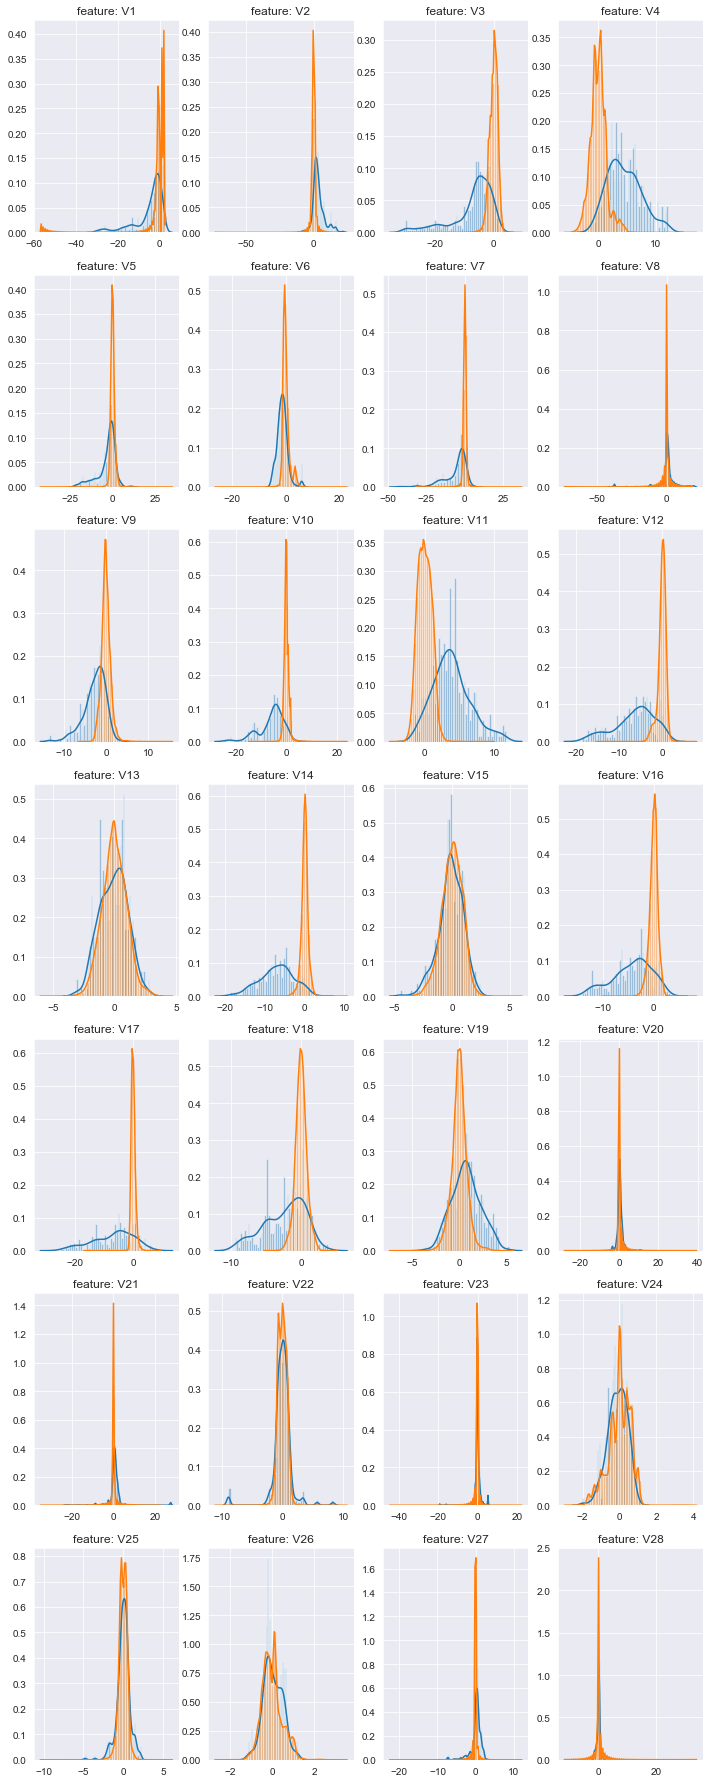

In [72]:
plt.figure(figsize=(12,8*4))
gs = gridspec.GridSpec(7, 4)
for i, cn in enumerate(train_df[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(train_df[cn][train_df.Class == 1], bins=50)
    sns.distplot(train_df[cn][train_df.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('feature: ' + str(cn))
plt.show()

Lets use Feature importance to get rid of unwanted features whose existance will not improve our prediction model.
I have used random forest classifier to identify the influential fetures

In [74]:
rnd_clf = RandomForestClassifier(n_estimators = 100 , criterion = 'entropy',random_state = 0)
rnd_clf.fit(train_df.iloc[:,1:29],train_df.iloc[:,30]);

In [79]:
x, y = (list(x) for x in zip(*sorted(zip(rnd_clf.feature_importances_, train_df.iloc[:,1:29].columns), 
                                                            reverse = False)))
trace2 = go.Bar(
    x=x ,
    y=y,
    marker=dict(
        color=x,
        colorscale = 'Viridis',
        reversescale = True
    ),
    name='Random Forest Feature importance',
    orientation='h',
)

layout = dict(
    title='Barplot of Feature importances',
     width = 600, height = 1000,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
#         domain=[0, 0.85],
    ),
    margin=dict(
    l=300,
),
)

fig1 = go.Figure(data=[trace2], layout=layout)
iplot(fig1)

In [80]:
for name, importance in zip(train_df.iloc[:,1:29].columns, rnd_clf.feature_importances_):
    if importance > 0.020 :
        print('"' + name + '"'+',')

"V3",
"V4",
"V7",
"V9",
"V10",
"V11",
"V12",
"V14",
"V16",
"V17",


In [81]:
train_df.drop(['V19','V21','V1','V2','V6','V5','V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8'], axis =1, inplace = True)

In [82]:
#I have removed Amount and Time feature since they wont add much value in calculating gaussian distribution.


train_df.drop(labels = ["Amount","Time"], axis = 1, inplace = True)


In [83]:
#Split the dataset into 2 part one with Class 1 and other with class 0

train_strip_v1 = train_df[train_df["Class"] == 1]
train_strip_v0 = train_df[train_df["Class"] == 0]

In the Anomalized technique we distribute this large dataset into 3 parts .

1) Normal Transactons: classified as 0 , no anomalized transaction should be present here since it is not a supervised method
How to get this dataset :- 60% of normal transactions should be added here.
Find out Epsilon by using min(Probability) command

2) dataset for Cross validation : from the remaining normal transaction take 50 % (i.e. 20 % as a whole since we have already took the data in the first step) and add 50% of the Anomalized data with this .

3) dataset for testing the algorithm :- this step is similar to what we did for Cross validattion.
Test dataset = leftover normal transaction + leftover Anomalized data

In [84]:
Normal_len = len (train_strip_v0)
Anomolous_len = len (train_strip_v1)

start_mid = Anomolous_len // 2
start_midway = start_mid + 1

train_cv_v1  = train_strip_v1 [: start_mid]
train_test_v1 = train_strip_v1 [start_midway:Anomolous_len]

start_mid = (Normal_len * 60) // 100
start_midway = start_mid + 1

cv_mid = (Normal_len * 80) // 100
cv_midway = cv_mid + 1

train_fraud = train_strip_v0 [:start_mid]
train_cv    = train_strip_v0 [start_midway:cv_mid]
train_test  = train_strip_v0 [cv_midway:Normal_len]

train_cv = pd.concat([train_cv,train_cv_v1],axis=0)
train_test = pd.concat([train_test,train_test_v1],axis=0)


print(train_fraud.columns.values)
print(train_cv.columns.values)
print(train_test.columns.values)

train_cv_y = train_cv["Class"]
train_test_y = train_test["Class"]

train_cv.drop(labels = ["Class"], axis = 1, inplace = True)
train_fraud.drop(labels = ["Class"], axis = 1, inplace = True)
train_test.drop(labels = ["Class"], axis = 1, inplace = True)

['V3' 'V4' 'V7' 'V9' 'V10' 'V11' 'V12' 'V14' 'V16' 'V17' 'V18' 'Class']
['V3' 'V4' 'V7' 'V9' 'V10' 'V11' 'V12' 'V14' 'V16' 'V17' 'V18' 'Class']
['V3' 'V4' 'V7' 'V9' 'V10' 'V11' 'V12' 'V14' 'V16' 'V17' 'V18' 'Class']


C:\Users\Anitha\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Choosing Epsilon Values
I calculated P value for all the rows present in Normal Transaction and found the minimum P value by using below command

min(p) 
similalrly I found the minimum P Value for rest of the datasets and found this value to be very close to 0 and then i found the max(p) value which is again somewhat far from 0.

Instead of looping between the epsilon values (between min and max of P) , i chose set of epsilon values for demonstration purpose to see how well i can perform to find the fraudulent transactions

In [88]:
from scipy.stats import multivariate_normal
mu, sigma = estimateGaussian(train_fraud)
p = multivariateGaussian(train_fraud,mu,sigma)
p_cv = multivariateGaussian(train_cv,mu,sigma)
p_test = multivariateGaussian(train_test,mu,sigma)

Performance wrt to Epsilon values¶


C:\Users\Anitha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



For below Epsilon
0.0
F1 score , Recall and Precision are as below
Best F1 Score 0.000000
Best Recall Score 0.000000
Best Precision Score 0.000000
----------------------------------------
For below Epsilon
1.0527717316e-70
F1 score , Recall and Precision are as below
Best F1 Score 0.817708
Best Recall Score 0.796954
Best Precision Score 0.839572
----------------------------------------
For below Epsilon
1.0527717316e-50
F1 score , Recall and Precision are as below
Best F1 Score 0.757794
Best Recall Score 0.802030
Best Precision Score 0.718182
----------------------------------------
For below Epsilon
1.0527717316e-24
F1 score , Recall and Precision are as below
Best F1 Score 0.535774
Best Recall Score 0.817259
Best Precision Score 0.398515
----------------------------------------


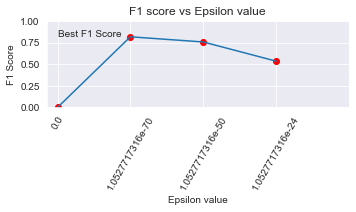

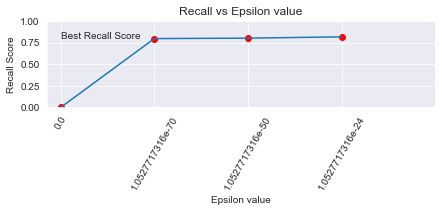

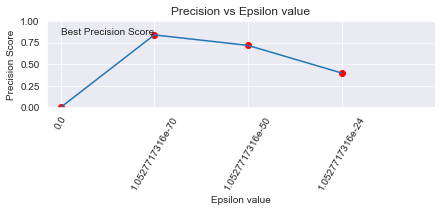

In [89]:
fscore, ep= selectThresholdByCV(p_cv,train_cv_y)


#### Epsilon value = 1.0527717316e-70 is selected as threshold to identify Anomalous transactions



In [90]:
predictions = (p_test < ep)
Recall = recall_score(train_test_y, predictions, average = "binary")    
Precision = precision_score(train_test_y, predictions, average = "binary")
F1score = f1_score(train_test_y, predictions, average = "binary")    
print ('F1 score , Recall and Precision for Test dataset')
print ('Best F1 Score %f' %F1score)
print ('Best Recall Score %f' %Recall)
print ('Best Precision Score %f' %Precision)

F1 score , Recall and Precision for Test dataset
Best F1 Score 0.826667
Best Recall Score 0.790816
Best Precision Score 0.865922


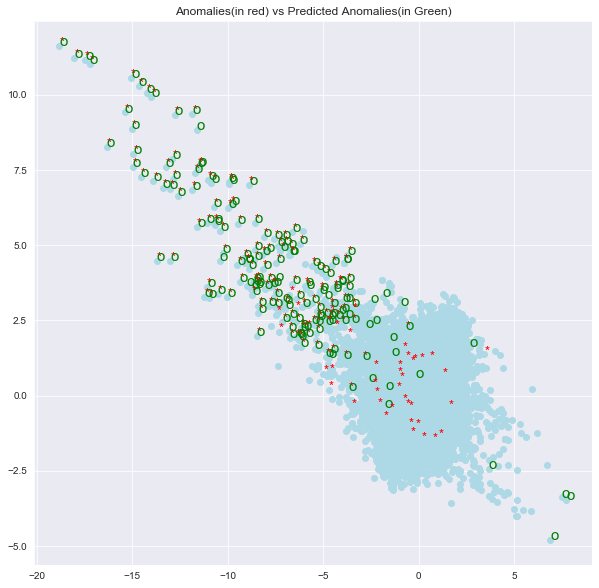

In [91]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(train_test['V14'],train_test['V11'],marker="o", color="lightBlue")
ax.set_title('Anomalies(in red) vs Predicted Anomalies(in Green)')
for i, txt in enumerate(train_test['V14'].index):
       if train_test_y.loc[txt] == 1 :
            ax.annotate('*', (train_test['V14'].loc[txt],train_test['V11'].loc[txt]),fontsize=13,color='Red')
       if predictions[i] == True :
            ax.annotate('o', (train_test['V14'].loc[txt],train_test['V11'].loc[txt]),fontsize=15,color='Green')

Summary of above Algorithm:

1) Find Epsilon value by considering only Normal Transaction.

2) Use this Epsilon value on CV dataset (Normal transaction + Anomalous transaction)

3) Come up with set of Epsilon values to see how your algorithm performs and note down the Best F1 score along with Recall and Precision percentage

4) Choose the Epsilon value with highest F1 score

5) Use this Epsilon value to predict the Anomalous transaction on Test Dataset